# AG002

#### Alunos: Marcelo Henrique Souza Abrantes e Eduardo de Souza Bazilio
##### Professor: Renzo Paranaíba Mesquita

##### Bibliotecas Utilizadas:

In [11]:
#!pip install pandas
#!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\marce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\marce\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


### Importação de bibliotecas utilizadas no projeto:

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

### Leitura dos dados utilizando a biblioteca Pandas:

In [13]:
df = pd.read_csv("wholesale.csv")
print(df.head())

  Channel Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  Retail  Other  12669  9656     7561     214              2674          1338
1  Retail  Other   7057  9810     9568    1762              3293          1776
2  Retail  Other   6353  8808     7684    2405              3516          7844
3  HoReCa  Other  13265  1196     4221    6404               507          1788
4  Retail  Other  22615  5410     7198    3915              1777          5185


### Substituir valores nas colunas usando o método ***replace*** de acordo com o mapeamento:
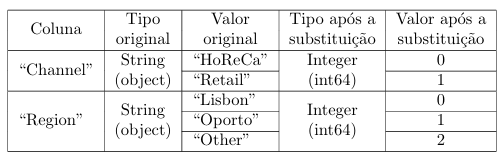

In [14]:
pd.set_option("future.no_silent_downcasting", True)

df['Channel'] = df['Channel'].replace({'HoReCa': 0, 'Retail': 1}).astype(int)
df['Region'] = df['Region'].replace({'Lisbon': 0, 'Oporto': 1, 'Other': 2}).astype(int)

print(df.head())

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        1       2  12669  9656     7561     214              2674   
1        1       2   7057  9810     9568    1762              3293   
2        1       2   6353  8808     7684    2405              3516   
3        0       2  13265  1196     4221    6404               507   
4        1       2  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185  


### Reordenar colunas usando a função ***reindex*** e o atributo ***columns***:

In [15]:
nova_ordem_colunas = ['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen', 'Channel']

df = df.reindex(columns=nova_ordem_colunas)
print(df.head())
print('\n',df.columns) #Print somente das colunas


   Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen  \
0       2  12669  9656     7561     214              2674          1338   
1       2   7057  9810     9568    1762              3293          1776   
2       2   6353  8808     7684    2405              3516          7844   
3       2  13265  1196     4221    6404               507          1788   
4       2  22615  5410     7198    3915              1777          5185   

   Channel  
0        1  
1        1  
2        1  
3        0  
4        1  

 Index(['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen', 'Channel'],
      dtype='object')


### Utilizar a função ***train_test_split*** para separar os dados em 80% para treinamento e 20% para testes:

In [16]:
X = df.drop('Channel', axis=1)  
y = df['Channel']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)

X_train:      Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
266       0    572   9763    22182    2221              4882          2563
294       1  21273   2013     6550     909               811          1854
31        2   2612   4339     3133    2088               820           985
84        2  11867   3327     4814    1178              3837           120
301       1   5283  13316    20399    1809              8752           172
..      ...    ...    ...      ...     ...               ...           ...
106       2   1454   6337    10704     133              6830          1831
270       0   4720   1032      975    5500               197            56
348       2   3428   2380     2028    1341              1184           665
435       2  29703  12051    16027   13135               182          2204
102       2   2932   6459     7677    2561              4573          1386

[352 rows x 7 columns]
X_test:      Region  Fresh   Milk  Grocery  Frozen  Detergents_Pape

### O modelo de classificação escolhido foi Decision Tree:

#### - Treinar modelo com o conjunto de treinamento e classificar as amostras utilizando as funções ***fit*** e ***predict***:

In [17]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

#Fazer previsões no conjunto de teste
y_pred = classifier.predict(X_test)

### Exibir métricas de avaliação, para verificar a acurácia usando a função ***classification_report***:

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        65
           1       0.67      0.78      0.72        23

    accuracy                           0.84        88
   macro avg       0.79      0.82      0.80        88
weighted avg       0.85      0.84      0.84        88



### Criar uma opção que permita o usuário inserir dados que devem ser classificados pelo modelo. O modelo deve imprimir de acordo com os conhecimentos se os dados inserisos são "HoReCa" ou "Retail". Utilize as funções ***input*** e ***predict***

In [19]:
region = int(input("Entre com o número referente a Região (Lisbon = 0, Oporto = 1, Other = 2): "))
fresh = float(input("Entre com o gasto anual com produtos frescos: "))
milk = float(input("Entre com o gasto anual com laticínios: "))
grocery = float(input("Entre com o gasto anual com produtos de mercearia: "))
frozen = float(input("Entre com o gasto anual com produtos congelados: "))
detergents_paper = float(input("Entre com o gasto anual com detergentes e produtos de papel: "))
delicatessen = float(input("Entre com o gasto anual com guloseimas: "))

# Criação de um DataFrame temporário com os nomes das colunas
dados_usuario = pd.DataFrame([[region, fresh, milk, grocery, frozen, detergents_paper, delicatessen]],
                             columns=['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'])


predicao = classifier.predict(dados_usuario)


if predicao == 1:
    print("O canal de vendas previsto é: Retail")
else:
    print("O canal de vendas previsto é: HoReCa")


O canal de vendas previsto é: HoReCa
